In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.7 MB 16.9 MB/s 
     |████████████████████████████████| 6.6 MB 53.6 MB/s 
     |████████████████████████████████| 101 kB 12.9 MB/s 
     |████████████████████████████████| 596 kB 89.5 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
#importing libraries
import numpy as np # linear algebra
import pandas as pd
import tensorflow as tf
import transformers

In [ ]:
#reading the dataset
data = pd.read_csv('IMDB Dataset.csv')
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [ ]:
#Checking the dataset
data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [ ]:
import re
#clearing punctuation & unnecessary marks
data['review'] = data['review'].apply(lambda x: re.sub('[,\.!?:()"]', '', x))
data['review'] = data['review'].apply(lambda x: re.sub('[^a-zA-Z"]', ' ', x))

#capitalization to lowercase
data['review'] = data['review'].apply(lambda x: x.lower())

#cleaning extra spaces
data['review'] = data['review'].apply(lambda x: x.strip())

In [ ]:
from bs4 import BeautifulSoup

In [ ]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text

#Apply function on review column
data['review']=data['review'].apply(denoise_text)
data

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production br br the ...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there s a family where a little boy ...,negative
4,petter mattei s love in the time of money is a...,positive
...,...,...
49995,i thought this movie did a down right good job...,positive
49996,bad plot bad dialogue bad acting idiotic direc...,negative
49997,i am a catholic taught in parochial elementary...,negative
49998,i m going to have to disagree with the previou...,negative


In [ ]:
#converting positive sentiments as 1 and negative as 0
def convert_label(data, label_col):
    data[label_col] = data[label_col].apply(lambda x: 1 if x == 'positive' else 0)

    return data
pd.options.display.max_rows = 1000
data_preproc = convert_label(data, 'sentiment')
data_preproc.sample(120)

,review,sentiment
48868,the biggest mystery of veronica mars is not on...,0
33874,this tv film tells the story of extrovert fran...,0
26409,the trouble with this sort of lyrical film mak...,0
23553,warning spoilers dear roger br br during ...,0
26254,i actually didn t enjoy this movie br br ...,0
44776,kennan ivory wayans was so funny in low down d...,0
32520,when you think of golf movies you think of cad...,1
4661,leaving aside the drawbacks and deficiencies o...,1
34497,the mother is that extraordinary piece of fil...,1
9555,i know i know it was a good ending but sincere...,1


In [ ]:
#tokenizing the dataset
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

def convert_tokenize(dataset):
    return dataset['review'].apply(lambda x: tokenizer(x, truncation=True, padding='max_length', max_length=128))

data_tokenized = convert_tokenize(data_preproc[:1000])
data_tokenized.sample()

529    [input_ids, attention_mask]
Name: review, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split

train_tok, val_tok = train_test_split(data_tokenized, test_size=0.33, shuffle=True)

In [ ]:
def convert_to_tfdata(data):
    def gen():
        for i, d in data.iteritems():
            yield ({
                'input_ids': d['input_ids'],
                'attention_mask': d['attention_mask'],
            }, data_preproc.loc[i]['sentiment'])

    return tf.data.Dataset.from_generator(
            gen,
            ({'input_ids': tf.int32, 'attention_mask': tf.int32}, tf.int64),
            ({'input_ids': tf.TensorShape([None]), 'attention_mask': tf.TensorShape([None])}, tf.TensorShape([])),
    )
train = convert_to_tfdata(train_tok).batch(32)
val = convert_to_tfdata(val_tok).batch(32)

In [ ]:
from transformers import TFAutoModelForSequenceClassification

model = TFAutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=3e-5, epsilon=1e-8, clipnorm=1.0),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy('accuracy')])

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['vocab_transform', 'activation_13', 'vocab_layer_norm', 'vocab_projector']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier', 'pre_classifier', 'dropout_19']
You should probably TRAIN this model on a down-stream task to be able to use i

In [ ]:
model.summary()

Model: "tf_distil_bert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 distilbert (TFDistilBertMai  multiple                 66362880  
 nLayer)                                                         
                                                                 
 pre_classifier (Dense)      multiple                  590592    
                                                                 
 classifier (Dense)          multiple                  1538      
                                                                 
 dropout_19 (Dropout)        multiple                  0         
                                                                 
Total params: 66,955,010
Trainable params: 66,955,010
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print(train)
print(val)

<BatchDataset element_spec=({'input_ids': TensorSpec(shape=(None, None), dtype=tf.int32, name=None), 'attention_mask': TensorSpec(shape=(None, None), dtype=tf.int32, name=None)}, TensorSpec(shape=(None,), dtype=tf.int64, name=None))>
<BatchDataset element_spec=({'input_ids': TensorSpec(shape=(None, None), dtype=tf.int32, name=None), 'attention_mask': TensorSpec(shape=(None, None), dtype=tf.int32, name=None)}, TensorSpec(shape=(None,), dtype=tf.int64, name=None))>


In [ ]:
history = model.fit(train, epochs=5, validation_data=val)

Epoch 1/5
21/21 [==============================] - 382s 18s/step - loss: 0.6462 - accuracy: 0.6478 - val_loss: 0.4909 - val_accuracy: 0.8061
Epoch 2/5
21/21 [==============================] - 365s 18s/step - loss: 0.3907 - accuracy: 0.8463 - val_loss: 0.4716 - val_accuracy: 0.7909
Epoch 3/5
21/21 [==============================] - 363s 17s/step - loss: 0.2109 - accuracy: 0.9239 - val_loss: 0.3570 - val_accuracy: 0.8636
Epoch 4/5
21/21 [==============================] - 368s 18s/step - loss: 0.1359 - accuracy: 0.9522 - val_loss: 0.3989 - val_accuracy: 0.8485
Epoch 5/5
21/21 [==============================] - 367s 18s/step - loss: 0.0564 - accuracy: 0.9866 - val_loss: 0.4419 - val_accuracy: 0.8394


{'loss': [0.6462462544441223, 0.39067620038986206, 0.21087029576301575, 0.13589048385620117, 0.056426603347063065], 'accuracy': [0.6477611660957336, 0.8462686538696289, 0.9238805770874023, 0.9522387981414795, 0.9865671396255493], 'val_loss': [0.49091121554374695, 0.47162795066833496, 0.3570442795753479, 0.3989202380180359, 0.4418538510799408], 'val_accuracy': [0.8060606122016907, 0.7909091114997864, 0.8636363744735718, 0.8484848737716675, 0.8393939137458801]}


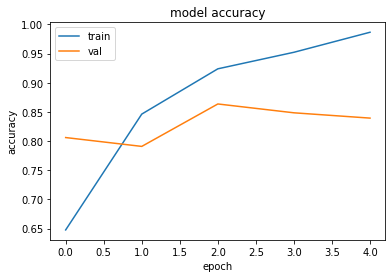

In [ ]:
from matplotlib import pyplot as plt

print(history.history)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
def prediction(pred_sentences):
  tf_batch = tokenizer(pred_sentences, max_length=128, padding=True, truncation=True, return_tensors='tf')
  tf_outputs = model(tf_batch)
  tf_predictions = tf.nn.softmax(tf_outputs[0], axis=-1)


  labels = ['Negative','Positive']
  label = tf.argmax(tf_predictions, axis=1)
  label = label.numpy()
  print(pred_sentences)
  print(labels[label[0]])

In [ ]:
prediction('The movie is ok I guess. Something nice to go with popcorn and stuff.')

The movie is ok I guess. Something nice to go with popcorn and stuff.
Positive


In [ ]:
prediction("It's not the first book on Systems Theory I've read, but even if this one is described as a primer, it was not time wasted (definitely).")

It's not the first book on Systems Theory I've read, but even if this one is described as a primer, it was not time wasted (definitely).
Positive


In [ ]:
prediction("The central thesis of this book devolves into the Goodness Gracious Me sketch about the Indian father. Everyone was Christian! Diderot? Christian! Voltaire? Christian! Karl Marx? Christian! Charlie Hebdo? Christian! (The Nazis were not Christian, but) Harvey Weinstein (yes, really)? Christian! The Women's March? Christian! It is almost always asserted rather than argued for properly, and it makes the last third of the book very dull indeed.")

The central thesis of this book devolves into the Goodness Gracious Me sketch about the Indian father. Everyone was Christian! Diderot? Christian! Voltaire? Christian! Karl Marx? Christian! Charlie Hebdo? Christian! (The Nazis were not Christian, but) Harvey Weinstein (yes, really)? Christian! The Women's March? Christian! It is almost always asserted rather than argued for properly, and it makes the last third of the book very dull indeed.
Negative


In [ ]:
prediction("This is a really bad movie. I hate it and will never watch again")

This is a really bad movie. I hate it and will never watch again
Negative


In [ ]:
prediction("The movie was just average. Did not like it much")

The movie was just average. Did not like it much
Negative


In [ ]:
prediction("Down Periscope has been in our library since it first arrived in VHS Since then we have acquired the DVD and a digital from Cinema NowIt is a quirky flick that does not go militarily overboard as either pro or con It is first and foremost a comedy and as a vehicle for the main characters I am quite surprised that a sequel has never been offeredThe movie has gained a following that borders on a cult obsession even among the very young I became aware of this while visiting the USS Drum in Mobile Alabama in 2002 A group of Cub Scouts my grandson among them had all taken up the roles from the movie and planned to relive it during their overnighter on boardIt is a fun romp that makes you proud both of our Navy and Hollywood which is rare companyThanks to Kelsey Grammar Lauren Holly and Rob Schneider for making what could have been an otherwise unremarkable movie such great entertainment")

Down Periscope has been in our library since it first arrived in VHS Since then we have acquired the DVD and a digital from Cinema NowIt is a quirky flick that does not go militarily overboard as either pro or con It is first and foremost a comedy and as a vehicle for the main characters I am quite surprised that a sequel has never been offeredThe movie has gained a following that borders on a cult obsession even among the very young I became aware of this while visiting the USS Drum in Mobile Alabama in 2002 A group of Cub Scouts my grandson among them had all taken up the roles from the movie and planned to relive it during their overnighter on boardIt is a fun romp that makes you proud both of our Navy and Hollywood which is rare companyThanks to Kelsey Grammar Lauren Holly and Rob Schneider for making what could have been an otherwise unremarkable movie such great entertainment
Positive


In [ ]:
prediction("Not Good")

Not Good
Negative


In [ ]:
prediction("I just re watched a few episodes of this series.")

I just re watched a few episodes of this series.
Negative


In [ ]:
prediction('Not going to recommend this movie to anyone')

Not going to recommend this movie to anyone
Negative


In [ ]:
prediction('Waste of money')

Waste of money
Negative


In [ ]:
prediction('New Content after so many years')

New Content after so many years
Positive


In [ ]:
prediction('Brave move with such controversial topic')

Brave move with such controversial topic
Positive


In [ ]:
prediction('')